In [619]:
import pandas as pd
import numpy as np

### Step 1
### Read the file train.csv into Python and print a few rows.

In [620]:
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [621]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [622]:
df.shape

(891, 12)

In [623]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [624]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


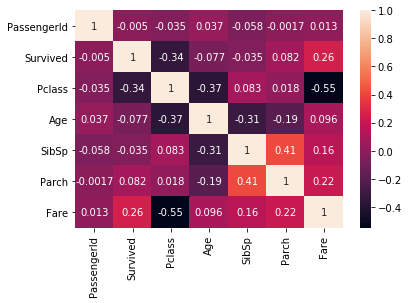

In [625]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

### Step 2
### Calculate the number of surviving/non-surviving passengers and display it as a bar plot

(array([0, 1]), <a list of 2 Text xticklabel objects>)

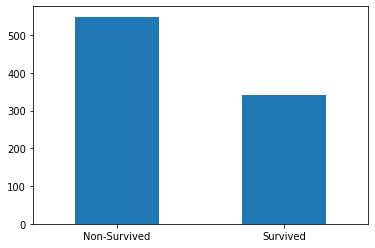

In [741]:
df_sr=df
df_sr['Survived'].replace({1 : "Survived", 0 : "Non-Survived"}, inplace=True)
pd.DataFrame(df_sr['Survived'].value_counts()).plot(kind='bar', legend=False)
plt.xticks(rotation=0)

### Step 3
### Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [627]:
sum(df['Pclass'] == 1)

216

In [628]:
df1=df.loc[(df['Survived'] == 1)]
df2=df1.loc[(df1['Pclass'] == 1)]
df2['Pclass'].sum()

136

In [629]:
df2['Pclass'].count() / np.sum(df['Pclass'] == 1)

0.6296296296296297

### Step 4
### Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [743]:
df3=df.loc[(df['Sex'] == 'female')]
df3['Survived'].count()

314

In [744]:
df3=df.loc[(df['Sex'] == 'male')]
df3['Survived'].count()

577

In [745]:
df_sex=pd.DataFrame(df.groupby('Sex')['Survived'].count())

In [746]:
df_class=pd.DataFrame(df.groupby('Pclass')['Survived'].count())

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

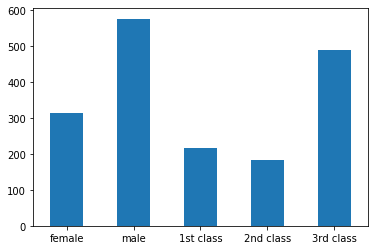

In [751]:
df_sc=df_sex.append(df_class)
df_sc.rename(index={1:'1st class', 2: '2nd class', 3: '3rd class'}, inplace=True)
df_sc
df_sc.plot(kind='bar', legend=False)
plt.xticks(rotation=0)

### Step 5
### Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

In [635]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [648]:
df_surv=df[['Survived','Age']]
df_surv=df_surv.dropna()
#df_surv['Survived']=df_surv['Survived'].replace({1:'Survived', 0:'Non-Survived'})
df_surv

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
885,0,39.0
886,0,27.0
887,1,19.0
889,1,26.0


(0.0, 100)

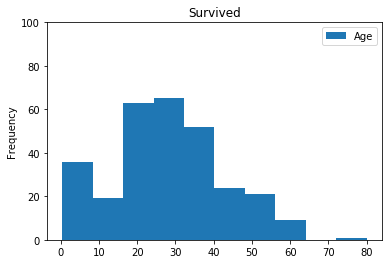

In [657]:
df_surv.loc[(df_surv['Survived'] == 1)].set_index(['Survived']).plot(kind='hist', title='Survived')
plt.ylim(top=100)

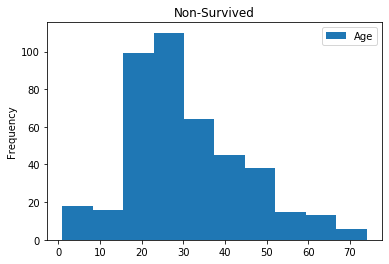

In [660]:
df_surv.loc[(df_surv['Survived'] == 0)].set_index(['Survived']).plot(kind='hist', title='Non-Survived')

### Step 6
### Calculate the average age for survived and drowned passengers separately.

In [669]:
df_surv.loc[(df_surv['Survived'] == 1)].mean()

Survived     1.00000
Age         28.34369
dtype: float64

In [668]:
df_surv.loc[(df_surv['Survived'] == 0)].mean()

Survived     0.000000
Age         30.626179
dtype: float64

### Step 7
### Replace missing age values by the mean age.

In [671]:
df_surv['Age'].mean()

29.69911764705882

In [678]:
df['Age'].replace({np.nan : df_surv['Age'].mean()}, inplace=True)

### Step 8
### Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [722]:
df_sex_2_1=pd.DataFrame(df.loc[(df['Survived']==1)].groupby(['Sex', 'Survived'])['Survived'].count())

In [719]:
df_sex_2_0=pd.DataFrame(df.loc[(df['Survived']==0)].groupby(['Sex', 'Survived'])['Survived'].count())

In [720]:
df_class_2_1=pd.DataFrame(df.loc[(df['Survived']==1)].groupby(['Pclass', 'Survived'])['Survived'].count())

In [721]:
df_class_2_0=pd.DataFrame(df.loc[(df['Survived']==0)].groupby(['Pclass', 'Survived'])['Survived'].count())

In [723]:
df_sc_2=pd.concat([df_sex_2_0, df_class_2_0, df_sex_2_1, df_class_2_1])
df_sc_2

,,Survived
Sex,Survived,
female,0,81
male,0,468
1,0,80
2,0,97
3,0,372
female,1,233
male,1,109
1,1,136
2,1,87


In [728]:
df_sc_2_1=pd.DataFrame(df.loc[(df['Survived']==1)].groupby(['Pclass', 'Survived','Sex'])['Survived'].count())

In [729]:
df_sc_2_0=pd.DataFrame(df.loc[(df['Survived']==0)].groupby(['Pclass','Survived','Sex'])['Survived'].count())

In [730]:
df_sc_fin=df_sc_2_1.append(df_sc_2_0)
df_sc_fin

Survived
Pclass Survived Sex             
1      1        female        91
                male          45
2      1        female        70
                male          17
3      1        female        72
                male          47
1      0        female         3
                male          77
2      0        female         6
                male          91
3      0        female        72
                male         300